In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

%matplotlib inline

In [2]:
eps_points = np.array([7.98270444e-05, 8.95674170e-05, 1.00496295e-04, 1.12758697e-04,
       1.26517339e-04, 1.41954789e-04, 1.59275893e-04, 1.78710492e-04,
       2.00516470e-04, 2.24983179e-04, 2.52435279e-04, 2.83237042e-04,
       3.17797188e-04, 3.56574309e-04, 4.00082956e-04, 4.48900459e-04,
       5.03674600e-04, 5.65132196e-04, 6.34088753e-04, 7.11459282e-04,
       7.98270444e-04, 8.95674170e-04, 1.00496295e-03, 1.12758697e-03,
       1.26517339e-03, 1.41954789e-03, 1.59275893e-03, 1.78710492e-03,
       2.24983179e-03, 2.52435279e-03, 2.83237042e-03,
       3.17797188e-03, 3.56574309e-03, 4.00082956e-03, 4.48900459e-03,
       5.03674600e-03, 5.65132196e-03, 6.34088753e-03, 7.11459282e-03])

fd_primary_points = np.array([10.47609494, 10.47609494, 10.4760836 , 10.4760836 , 10.4760818 ,
       10.47608   , 10.4760782 , 10.4760764 , 10.4760728 , 10.4760692 ,
       10.4760638 , 10.4760584 , 10.4760494 , 10.4760404 , 10.476026  ,
       10.4760098 , 10.47599   , 10.4759684 , 10.475945  , 10.4758964 ,
       10.4758478 , 10.4757614 , 10.47572425, 10.47564285, 10.47554665,
       10.4754256 , 10.4752852 , 10.4751124 , 10.47463   ,
       10.47434454, 10.47410136, 10.47383   , 10.47345382, 10.47323   ,
       10.47291304, 10.47261696, 10.47233886, 10.4719652 , 10.4715892 ])

In [3]:
fd_secondary_points = np.array([10.4745,10.4744,10.4740,10.4738,10.4735,10.4732,10.4729,10.4726,10.4722,10.4719,10.4715,10.4710,10.4705])
secondary_fill = 10.4745
n_points = eps_points.shape[0]
m_s_points = fd_secondary_points.shape[0]
fill_array = np.array([secondary_fill for i in range(n_points-m_s_points)])
fd_secondary_points = np.hstack([fill_array,fd_secondary_points])

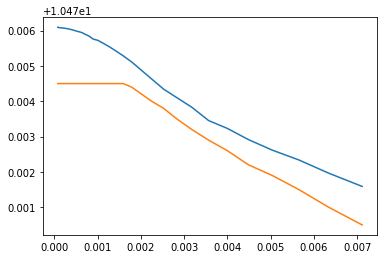

In [4]:
fig, axes = plt.subplots(1,1)

axes.plot(eps_points, fd_primary_points)
axes.plot(eps_points, fd_secondary_points)

In [5]:
primary_func = interp1d(eps_points, fd_primary_points, fill_value='extrapolate')
secondary_func = interp1d(eps_points, fd_secondary_points, fill_value='extrapolate')

In [6]:
def frequencies_gen(fd0, fd1, fd2, fd3, df0, df1, df2):
    
    frequencies1 = np.arange(fd0, fd1+df0, df0)
    frequencies2 = np.arange(fd1, fd2+df1, df1)
    frequencies3 = np.arange(fd3, fd2-df2, -df2)

    frequencies = np.hstack([frequencies1, frequencies2, frequencies3])
    
    frequencies = np.round(frequencies, 10)
    
    frequencies = np.array(sorted(set(list(frequencies))))
    
    return frequencies  

In [7]:
def t_gen(eps_array):
    n_spectra = eps_array.shape[0]
    t_array = np.zeros(n_spectra, dtype=np.int)
    t_array += 3 * (eps_array <= 1e-5)
    t_array += 4 * (1e-5 < eps_array) * (eps_array <= 1e-4)
    t_array += 6 * (1e-4 < eps_array) * (eps_array <= 1e-3)
    t_array += 7 * (1e-3 < eps_array) * (eps_array <= 2e-3)
    t_array += 8 * (2e-3 < eps_array) * (eps_array <= 3e-3)
    t_array += 9 * (3e-3 < eps_array) * (eps_array <= 4e-3)
    t_array += 9 * (4e-3 < eps_array) * (eps_array <= 5e-3)
    t_array += 9 * (5e-3 < eps_array) * (eps_array <= 6e-3)
    t_array += 9 * (6e-3 < eps_array) * (eps_array <= 7e-3)
    t_array += 9 * (7e-3 < eps_array) * (eps_array <= 8e-3)
    return t_array + 1

def c_gen(eps_array):
    n_spectra = eps_array.shape[0]
    c_array = np.zeros(n_spectra, dtype=np.int)
    c_array += 3 * (eps_array <= 1e-5)
    c_array += 5 * (1e-5 < eps_array) * (eps_array <= 1e-4)
    c_array += 11 * (1e-4 < eps_array) * (eps_array <= 1e-3)
    c_array += 20 * (1e-3 < eps_array) * (eps_array <= 2e-3)
    c_array += 30 * (2e-3 < eps_array) * (eps_array <= 3.0e-3)
    c_array += 40 * (3e-3 < eps_array) * (eps_array <= 4e-3)
    c_array += 50 * (4e-3 < eps_array) * (eps_array <= 5e-3)
    c_array += 55 * (5e-3 < eps_array) * (eps_array <= 6e-3)
    c_array += 65 * (6e-3 < eps_array) * (eps_array <= 7e-3)
    c_array += 75 * (7e-3 < eps_array) * (eps_array <= 8e-3)
    return c_array + 5


In [8]:
3e4 / (2*np.pi*1000)

4.7746482927568605

In [9]:
base_Ec = 0.2197428476508422
base_fc = 10.4263
base_Ej = 46.813986415542402
base_g = 0.28492608868781633
base_gamma_phi = 0.0
base_kappa_phi = 0.0
base_gamma = 0.0
base_eps = 0.00278160616
base_kappa = 0.0014322
base_n_t = 0.0
base_n_c = 0.035
fd = 9.27594
#completed = 0
#running = 0
name = 'gamma_phi'


sweep_list = np.array([0.00266514, 0.00304213, 0.00333483, 0.00373371, 0.00443115,
       0.00494409, 0.00546806, 0.00607245, 0.00678645, 0.00761325])


eps_list = sweep_list

endtime_list = [3e4 for param in sweep_list]
snapshots_list = [2001 for param in sweep_list]

#fd0_list = [10.485 for param in sweep_list]
#fd1_list = [10.4875]
#fd2_list = [10.494]
#fd3_list = [10.500 for param in sweep_list]

primaries = np.round(primary_func(eps_list),4)
secondaries = np.round(secondary_func(eps_list),4)
differences = primaries - secondaries

fd0_list = secondaries - 7*differences
fd1_list = secondaries - 2*differences
fd2_list = primaries + differences
fd3_list = primaries + 4*differences

df0_list = [0.001 for param in sweep_list]
df1_list = [0.0002 for param in sweep_list]
df2_list = [0.001 for param in sweep_list]

group_folders = ['-20dBm', '-19dBm', '-18dBm', '-17dBm', '-16dBm', '-15dBm', '-14dBm', '-13dBm', '-12dBm', '-11dBm']


gamma_phi_list = [base_gamma_phi for param in sweep_list]
gamma_list = [base_gamma for param in sweep_list]
nc_list = [base_n_c for param in sweep_list]
nt_list = [base_n_t for param in sweep_list]
fc_list = [base_fc for param in sweep_list]
kappa_list = [base_kappa for param in sweep_list]
g_list = [base_g for param in sweep_list]
Ec_list = [base_Ec for param in sweep_list]
Ej_list = [base_Ej for param in sweep_list]

eps_list = np.array(eps_list)
t_list = t_gen(eps_list)
c_list = c_gen(eps_list)

#group_folders = [str(1000*param).replace('.','_') + 'MHz' for param in sweep_list]
#group_folders = [str(param).replace('.','_') for param in sweep_list]

content = [eps_list, fd0_list, fd1_list, fd2_list, fd3_list, df0_list, df1_list, df2_list, t_list, c_list, endtime_list, snapshots_list, group_folders, gamma_list, nc_list,kappa_list,nt_list,g_list,gamma_phi_list,Ec_list,Ej_list,fc_list]

columns = ['eps', 'fd0', 'fd1', 'fd2', 'fd3', 'df0', 'df1', 'df2', 't_levels', 'c_levels', 'endtime', 'snapshots', 'group_folder','gamma', 'n_c','kappa','n_t','g','gamma_phi','Ec','Ej','fc']

recipe = pd.DataFrame(content).T
recipe.columns = columns

In [10]:
qubit_states = np.array([1])

#columns = ['eps','fd','qubit_state','t_levels','c_levels','fc','Ej','g','Ec','kappa', 'gamma', 'gamma_phi', 'n_t', 'n_c', 'end_time', 'snapshots', 'group_folder', 'completed', 'running']
columns = ['eps','fd','qubit_state','t_levels','c_levels','fc','Ej','g','Ec','kappa', 'gamma', 'gamma_phi', 'n_t', 'n_c', 'end_time', 'snapshots', 'group_folder']

In [11]:
queue_list = []

for index in range(recipe.shape[0]):
    row = recipe.iloc[index,:]
    frequencies = frequencies_gen(row.fd0, row.fd1, row.fd2, row.fd3, row.df0, row.df1, row.df2)

    #arrays = np.meshgrid(row.eps, frequencies, qubit_states, row.t_levels, row.c_levels, fc, Ej, g, Ec, kappa, gamma, gamma_phi, n_t, n_c, row.endtime, row.snapshots, 1, completed, running, indexing='ij')
    arrays = np.meshgrid(row.eps, frequencies, qubit_states, row.t_levels, row.c_levels, row.fc, row.Ej, row.g, row.Ec, row.kappa, row.gamma, row.gamma_phi, row.n_t, row.n_c, row.endtime, row.snapshots, row.group_folder, indexing='ij')
    #shape = arrays[16].shape
    #arrays[16] = np.tile(row.group_folder,shape)
    
    flattened = []
    for array in arrays:
        flattened.append(array.flatten())
    
    df = pd.DataFrame(flattened).T
    df.columns = columns
    
    queue_list.append(df)
    
combined_queue = pd.concat(queue_list)
combined_queue.index = np.arange(combined_queue.shape[0])
combined_queue.index.name = 'job_index'

In [14]:
with open('stack.csv','w') as f:
    f.write(name+'\n')
combined_queue.to_csv('stack.csv')